# Дипломная работа по курсу «Python для анализа данных»

# *Смирнов Юрий*

## Группа: PYDA-8A, март-июнь, 2020 г.


1. Загрузить файл hr.csv (можно найти во сложении к заданию)
1. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
1. Рассчитать и визуализировать корреляционную матрицу для переменных
1. Визуализировать несколько взаимосвязей между переменными
1. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
1. Рассчитать сколько работников работает в каждом департаменте
1. Показать распределение сотрудников по зарплатам
1. Показать распределение сотрудников по зарплатам совместно с департаментами
1. Сколько сотрудников покинули компанию
1. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
1. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

## Подключение библиотек

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


![Columns_info](columns_info.png)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Подготовка данных

In [4]:
# переименование столцов в одинаковом стиле
df.rename(columns = {'Work_accident':'work_accident'}, inplace=True)
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [5]:
# # кодирование строковых значений
# print('Отделы:', df.sales.unique())
# print('Зарплата:', df.salary.unique())
# sales = df.sales.unique()
# sales_code = range(0, len(sales))
# sales_coding = dict(zip(sales, sales_code))  # словарь для кодирования
# salary_coding = dict(
#     zip(
#         df.salary.unique(),
#         range(len(df.salary.unique()))
#        )
       
#     )
# print('\nСловарь для кодирования отделов:', sales_coding)
# print('Словарь для кодирования зарплат:', salary_coding)

# ## создание новых столбцов с условными кодами отдела и зарплаты
# df['sales_c'] = df['sales'].map(sales_coding)  
# df['salary_c'] = df['salary'].map(salary_coding)
# df.head()

In [6]:
# кодирование строковых значений
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# x[:, 0] = labelencoder.fit_transform(x[:, 0])
df['sales_c'] = labelencoder.fit_transform(df['sales'])
display(df.sales.unique())
display(df.sales_c.unique())
df['salary_c'] = labelencoder.fit_transform(df['salary'])
display(df.salary.unique())
display(df.salary_c.unique())


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

array(['low', 'medium', 'high'], dtype=object)

array([1, 2, 0])

In [7]:
print('Количество нувевых значений:', df.isna().sum().sum())
df.isna().sum()

Количество нувевых значений: 0


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
sales_c                  0
salary_c                 0
dtype: int64

**Вывод:** все ячейки таблицы заполнены (пропусков - NaN - нет)

## Основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [8]:
df.describe()
# df.describe(include=['object'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_c,salary_c
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002310D442408>,
      dtype=object)

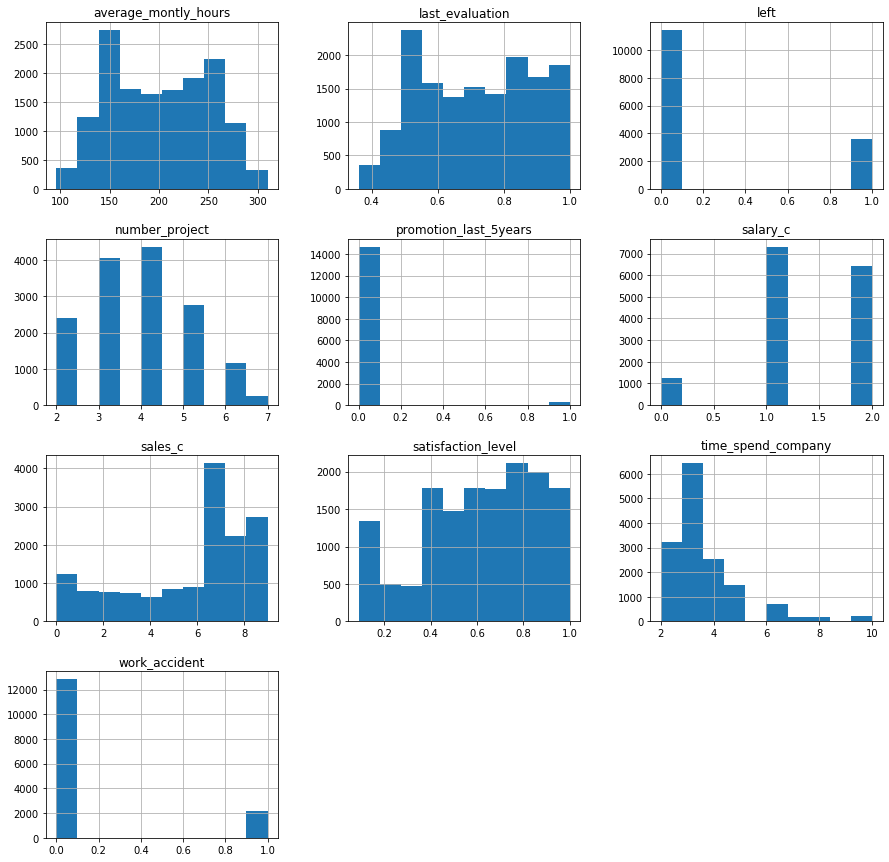

In [9]:
df.hist(figsize=(15,15))

## Расчет и визуализация корреляционной матрицы для переменных

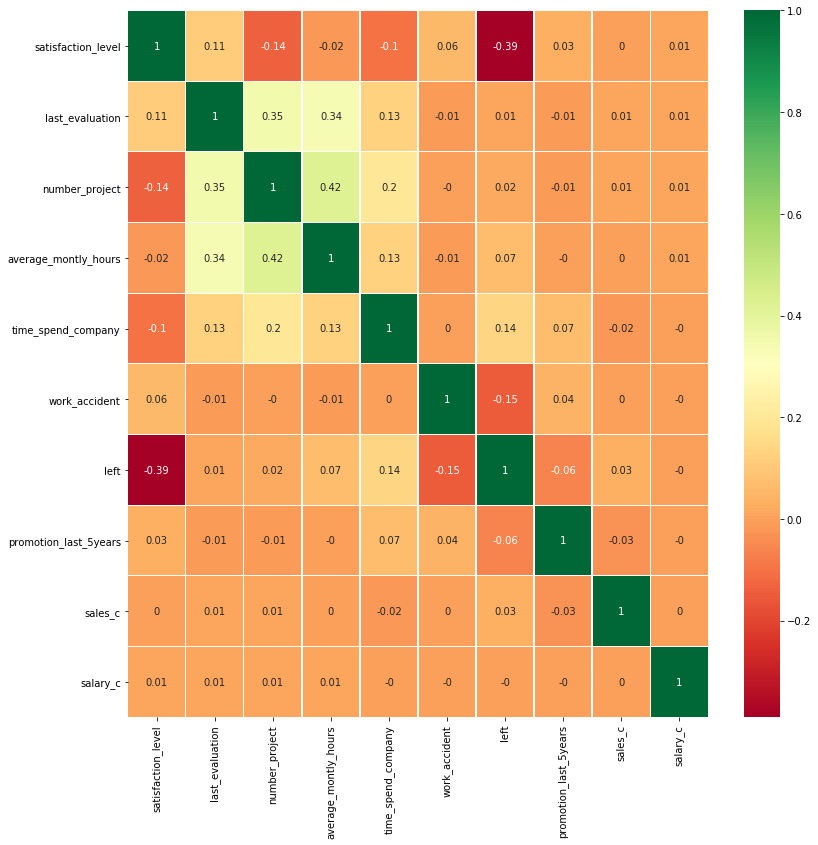

In [10]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

**Вывод:**
- сильных (коэффициен более 0,8) линейных зависимостей не наблюдаются; 
- наибольшие зависимости:

1) 0.42 номер проекта-средние часы в месяц (вероятно, случайная зависимость, т.к. номер проекта условен)

2) -0.39 уровень удовлетворенности - увольнение: неудовлетворенный сотрудник - большая вероятность уовльнения

## Визуализация взаимосвязей между переменными

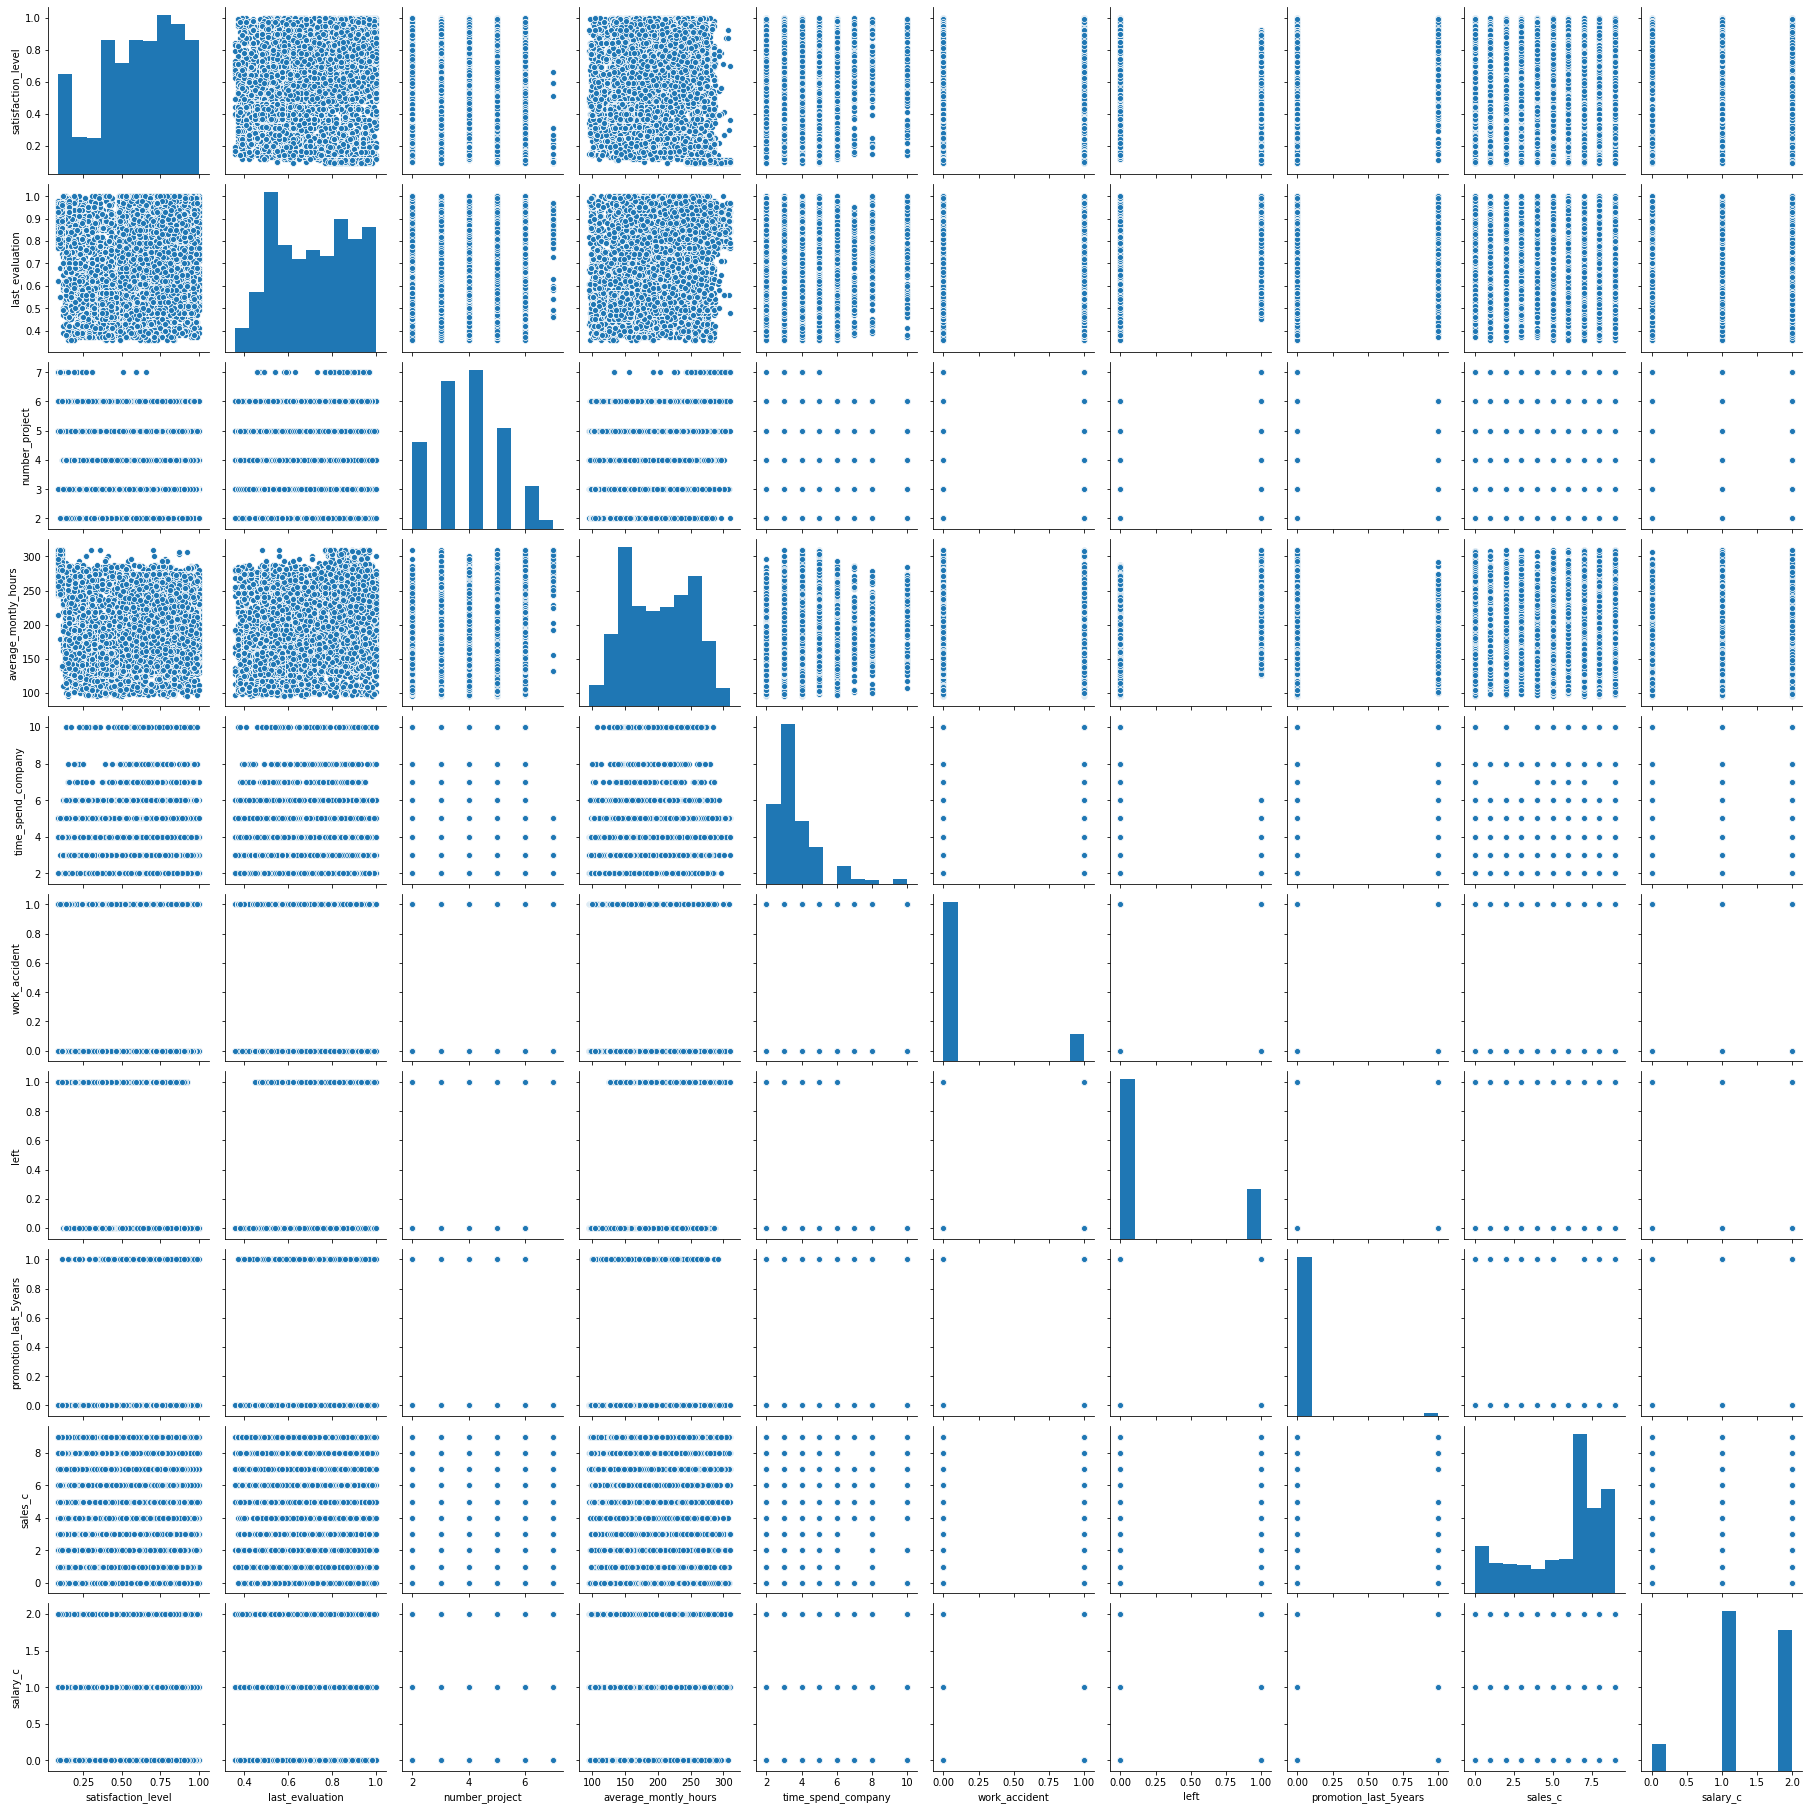

In [11]:
g = sns.pairplot(df)
# fig = sns.pairplot(data=df, hue='left')
plt.show()

**Вывод:** ярких и очевидных взаимосвязей между переменными не наблюдается.

## Проверка взаимосвязи между переменными с использованием t-test статистики

*Следует отметить, что имеющие данные не имеют нормального распределения и равенства дисперсий, поэтому применение t-test статистики не совсем корректно.*

In [12]:
import scipy.stats as sts

In [13]:
def check_correlation(x, y):
    # проверка на нормальное распределение
    k2, p = sts.normaltest(x)
    alpha = 0.01
    print("p = {:g}".format(p))
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("X: Не нормальное распределение для alpha = ", alpha)
    else:
        print("X: Нормальное распределение для alpha = ", alpha)
    print("p = {:g}".format(p))
    
    k2, p = sts.normaltest(y)
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Y: Не нормальное распределение для alpha = ", alpha)
    else:
        print("Y: Нормальное распределение для alpha = ", alpha)    

    # построение графика    
    sns.regplot(x=x, y=y, fit_reg=True,marker=".")
    # расчет статистики
    corr, p_value = sts.pearsonr(x, y)
    print('Корреляция Пирсона: коэф-т', corr,', p-value', p_value)
    corr, p_value = sts.spearmanr(x, y)
    print('Корреляция Спирмена: коэф-т', corr,', p-value', p_value)
    corr, p_value = sts.kendalltau(x, y)
    print('Корреляция Кендалла: коэф-т', corr,', p-value', p_value)

p = 1.64129e-261
X: Не нормальное распределение для alpha =  0.01
p = 1.64129e-261
Y: Не нормальное распределение для alpha =  0.01
Корреляция Пирсона: коэф-т -0.38837498342411414 , p-value 0.0
Корреляция Спирмена: коэф-т -0.3658422374194663 , p-value 0.0
Корреляция Кендалла: коэф-т -0.30067517457448134 , p-value 0.0


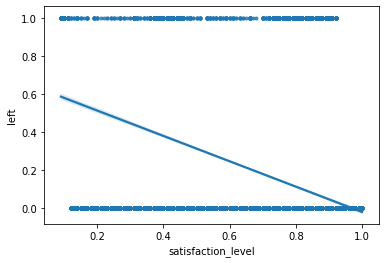

In [14]:
check_correlation(df['satisfaction_level'], df['left'])

p = 0
X: Не нормальное распределение для alpha =  0.01
p = 0
Y: Не нормальное распределение для alpha =  0.01
Корреляция Пирсона: коэф-т 0.33974179983835906 , p-value 0.0
Корреляция Спирмена: коэф-т 0.342061328238957 , p-value 0.0
Корреляция Кендалла: коэф-т 0.23537391303739313 , p-value 0.0


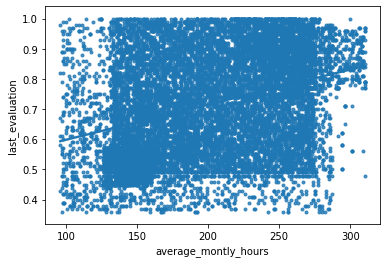

In [15]:
check_correlation(df['average_montly_hours'], df['last_evaluation'])

## Количество работников в каждом департаменте

In [16]:
# df.groupby(by='sales')['left'].count()
employee = df.pivot_table(
    values=['satisfaction_level'], 
    index=['sales'], columns=['left'], 
    aggfunc='count'
    ).reset_index()

# employee.rename(columns={('satisfaction_level',  0):('employee', 'now')}, inplace=True)
# employee[[('sales',''),( 'satisfaction_level',  0)]]
print('Количество работников по департаментам (0 - работают сейчас, 1 - было уволено):')
display(employee)

Количество работников по департаментам (0 - работают сейчас, 1 - было уволено):


sales satisfaction_level      
left                               0     1
0              IT                954   273
1           RandD                666   121
2      accounting                563   204
3              hr                524   215
4      management                539    91
5       marketing                655   203
6     product_mng                704   198
7           sales               3126  1014
8         support               1674   555
9       technical               2023   697

In [17]:
employee[('satisfaction_level',  0)]
employee['sales']

0             IT
1          RandD
2     accounting
3             hr
4     management
5      marketing
6    product_mng
7          sales
8        support
9      technical
Name: sales, dtype: object

Text(0.5, 1.0, 'Количество работников по департаментам')

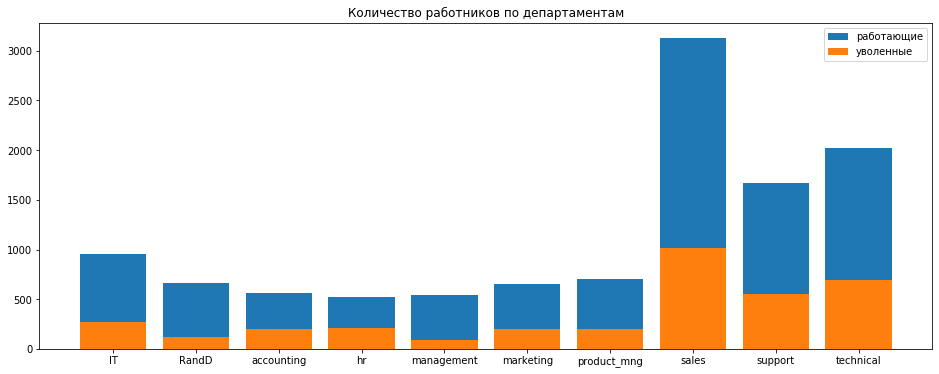

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))
rects1 = ax.bar(employee.sales, employee[('satisfaction_level',  0)], label='работающие')
rects1 = ax.bar(employee.sales, employee[('satisfaction_level',  1)], label='уволенные')
ax.legend()
ax.set_title('Количество работников по департаментам')

## Распределение сотрудников по зарплатам

salary
high      1237
low       7316
medium    6446
Name: left, dtype: int64

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

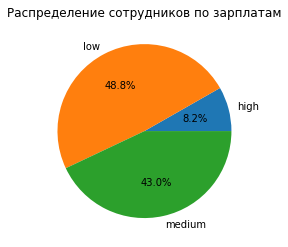

In [19]:
salaries = df.groupby(by='salary').count()['left'] 
display(salaries)
plt.pie(salaries,labels=salaries.index, autopct='%1.1f%%')
plt.title('Распределение сотрудников по зарплатам')

## Распределение сотрудников по зарплатам совместно с департаментами

In [20]:
salaries_sales = df.pivot_table(values='left', index='sales', columns='salary', aggfunc='count')

display(salaries_sales)

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


## Количество сотрудников, покинувших компанию

In [21]:
print('Из компании ушло', employee[('satisfaction_level',  1)].sum(), 'человек, в том числе из отделов:')

employee[[('sales',''),('satisfaction_level',  1)]]

Из компании ушло 3571 человек, в том числе из отделов:


,sales,satisfaction_level
left,,1
0,IT,273
1,RandD,121
2,accounting,204
3,hr,215
4,management,91
5,marketing,203
6,product_mng,198
7,sales,1014
8,support,555


Text(0.5, 1.0, 'Количество сотрудников, покинувшых компанию (по отделам)')

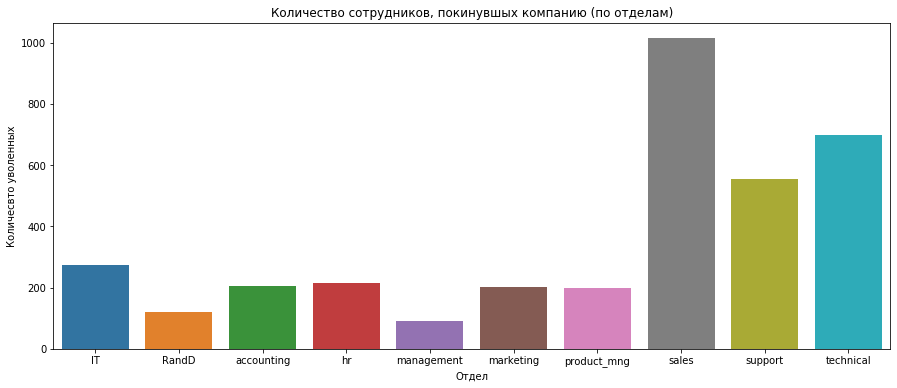

In [22]:
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=employee[('sales','')], y=employee[( 'satisfaction_level',  1)])

plt.xlabel('Отдел')
plt.ylabel('Количесвто уволенных')
plt.title("Количество сотрудников, покинувшых компанию (по отделам)")
# plt.legend()


**Вывод:**
    - больше всего уволено сотрудников из отдела продаж,технического отдела и отдела поддержки.

Text(0.5, 1.0, 'Доля сотрудников, покинувшых компанию (по отделам)')

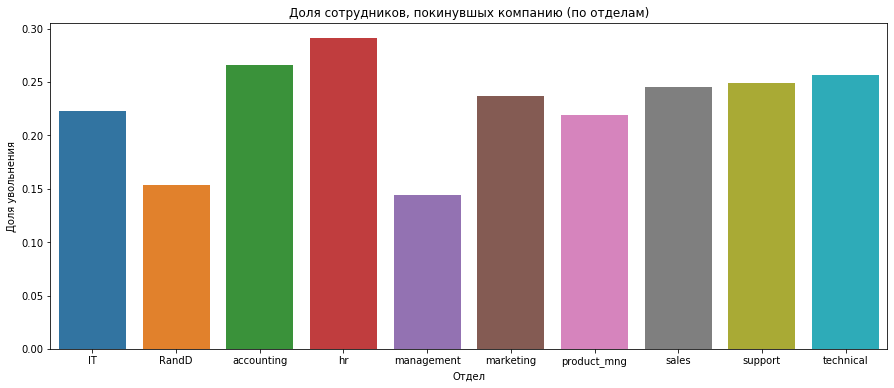

In [23]:
employee[('satisfaction_level',  'part')] = (
    employee[('satisfaction_level',  1)]/
              (employee[('satisfaction_level',  0)]+employee[('satisfaction_level',  1)]
              )
    )
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=employee[('sales','')], y=employee[( 'satisfaction_level',  'part')])

plt.xlabel('Отдел')
plt.ylabel('Доля увольнения')
plt.title("Доля сотрудников, покинувшых компанию (по отделам)")

**Вывод:** В относительном виде большему обновлению подверглись отдел кадров, технический отдел и бухгалтерия - более 25% кадров.

## Гипотезы для данных: почему сотрудники покидают компанию?

In [24]:
# df.groupby(by='left').agg([np.min, np.mean, np.max])
df.groupby(by='left').agg(np.mean)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,sales_c,salary_c
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


**Вывод:** между работающими и уволенными
- наблюдяется явная разница  по параметрам: уровень удовлетворенности, отработанное время в месяц, стаж в компании, несчастные случаи (причем у работающих случаев больше!), повышение, 
- практические одинаковы: последнее повышение (нет информации по времени!)

### 1) удовлетворенность работающих и уволенных

Гипотеза H0: удовлетворенность работающих и уволенных одинакова:

In [25]:
satisfaction_working = df[df.left == 0]['satisfaction_level']
satisfaction_left = df[df.left == 1]['satisfaction_level']

sts.ttest_ind(satisfaction_working, satisfaction_left)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

**Вывод:** p-value равно 0.0, что намного меньше  стандартной альфа ошибки 0.05, нулевая гипотезу не может быть принята. Можно сказать, что имеется статистическое различие между удовлетворенностью работающих и уволенных.

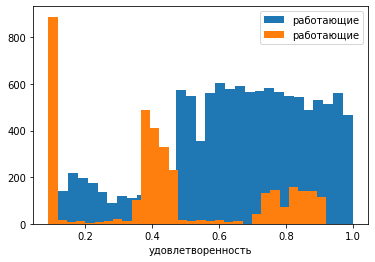

In [26]:
plt.hist(satisfaction_working, bins=30, label='работающие')
plt.hist(satisfaction_left, bins=30, label='работающие')
plt.xlabel('удовлетворенность')
plt.legend()

In [27]:
print(f'Среднеяя удовлетворенность работающих {satisfaction_working.mean():.2f}, уволенных: {satisfaction_left.mean():.2f}.')

Среднеяя удовлетворенность работающих 0.67, уволенных: 0.44.


### 2) Последняя оценка vs. увольнение

Гипотеза H0: распределение последних оценок работающих и уволенных схожи:

P-value 0.0


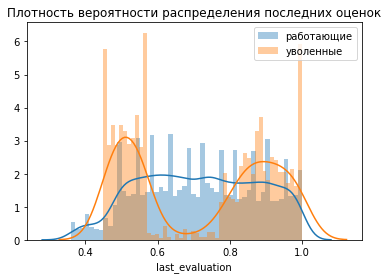

In [28]:
# подготовка данных
last_eval_working = df[df.left == 0]['last_evaluation']
last_eval_left = df[df.left == 1]['last_evaluation']
# двухвыборочный t-критерий для независимых выборок
statistics, p_value = sts.ttest_ind(satisfaction_working, satisfaction_left)
print(f'P-value {p_value}')

sns.distplot(last_eval_working, 50, label='работающие')
sns.distplot(last_eval_left, 50, label='уволенные')
plt.title('Плотность вероятности распределения последних оценок')
plt.legend()
plt.show()

**Вывод:**
- наблюдается значительное статистическое различие последних оценок работающих и уволенных 
- увольняются самые лучшие - с оценками около 0,8 и выше
- увольняют(ся) соктрудники с оценками ниже среднего (около 0,5).

### Средние часы в месяц vs. увольнение

Гипотеза H0: работающие и уволенные всреднем отрабатывают одинаковое время в месяц

P-value 2.3113035567540143e-18


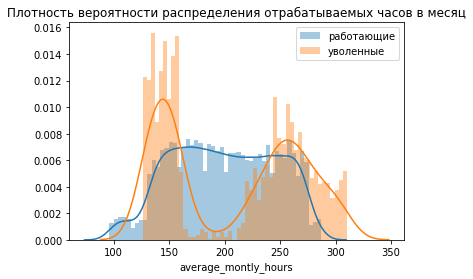

In [29]:
# подготовка данных
hours_working = df[df.left == 0]['average_montly_hours']
hours_left = df[df.left == 1]['average_montly_hours']
# двухвыборочный t-критерий для независимых выборок
statistics, p_value = sts.ttest_ind(hours_working, hours_left)
print(f'P-value {p_value}')

sns.distplot(hours_working, 50, label='работающие')
sns.distplot(hours_left, 50, label='уволенные')
# sns.distplot(df.average_montly_hours, 50, label='все')
plt.title('Плотность вероятности распределения отрабатываемых часов в месяц')
plt.legend()
plt.show()

In [30]:
hours_working.quantile([0.5, 0.75])
df.groupby(by='left')['average_montly_hours'].agg([np.min, np.mean, np.max])

,amin,mean,amax
left,,,
0,96,199.060203,287
1,126,207.419210,310


Гипотеза H0: и те, кто перерабатывает, и те, кто не до рабатывает, увольняются одинаково

In [31]:
# подготовка данных
left_low_working = df[df.average_montly_hours < df.average_montly_hours.quantile()]['left']
left_high_working = df[df.average_montly_hours >= df.average_montly_hours.quantile()]['left']
print(f'Среди работавших в месяц меньше среднего уволено {len(left_low_working)} чел.')
print(f'Среди работавших в месяц больше среднего уволено {len(left_high_working)} чел.')

Среди работавших в месяц меньше среднего уволено 7466 чел.
Среди работавших в месяц больше среднего уволено 7533 чел.


**Вывод:**
- наблюдается значительное статистическое различие времени работы в месяц работающих и уволенных 
- увольняются те, кто работает больше всех
- увольняют(ся) соктрудники с оценками ниже среднего (около 0,5).

### Стаж в компании vs. увольнение

             Variable        N      Mean        SD        SE  95% Conf.  \
0  time_spend_company  11428.0  3.380032  1.562348  0.014615   3.351384   
1  time_spend_company   3571.0  3.876505  0.977698  0.016361   3.844427   
2            combined  14999.0  3.498233  1.460136  0.011922   3.474864   

   Interval  
0  3.408679  
1  3.908583  
2  3.521602  
_____________________________
                                  Independent t-test     results
0  Difference (time_spend_company - time_spend_co...     -0.4965
1                              Degrees of freedom =   14997.0000
2                                               t =     -17.9242
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       0.0000
5                          Difference > 0 p value =       1.0000
6                                       Cohen's d =      -0.3436
7                                       Hedge's g =      -0.3436
8                           

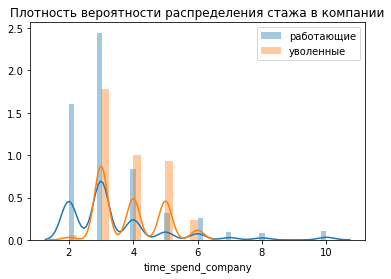

In [32]:
# подготовка данных
time_working = df[df.left == 0]['time_spend_company']
time_left = df[df.left == 1]['time_spend_company']

import researchpy as rp
descriptives, results = rp.ttest(time_working, time_left)

print(descriptives)
print('_____________________________')
print(results)

sns.distplot(time_working, label='работающие')
sns.distplot(time_left, label='уволенные')
plt.title('Плотность вероятности распределения стажа в компании')
plt.legend()
plt.show()

**Выводы:**
- среди работающих и уволенных распределения стажа работы в компания статистически отличаются (p-value практически 0);
- больше все увольняются сотрудники со стажем от 3 до 6 лет;
- со стажем 4 и 5 лет работают меньше, чем уволенных;
- пик увольнений - на третий год работы в компании - сотрудники, вероятно, осваиваются и понимают себя и свои перспективы в компании, компания - оценивает роль сотрудника в компании, и принимается решение о дальнейшем сотрудничестве;
- на 4 и 5 года работы, вероятно, происходит переоценка принятого на третьем году рабты решения, те, кто не оправдал ожидания, покидают компанию

### Проект vs. увольнение

In [33]:
projects = df.pivot_table(
    values=['satisfaction_level'], 
    index=['number_project'], columns=['left'], 
    aggfunc='count'
    ).reset_index()
# df.groupby(by='number_project')['left'].count()
projects

number_project satisfaction_level        
left                                 0       1
0                 2              821.0  1567.0
1                 3             3983.0    72.0
2                 4             3956.0   409.0
3                 5             2149.0   612.0
4                 6              519.0   655.0
5                 7                NaN   256.0

**Выводы:**
- проект №7 завершен, все сотрудники уволены (?)
- количество уволенных сотрудников в каждом проекте разное (м.б. связано с временем жизни проекта, сложностью)
- наиболее стабильный по кадрам - проект №3 (72 уволенных и 3983 работаюищх)
- в проекте №2 практически трижды сменился коллектив

### Классификация:

In [34]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'sales_c', 'salary_c'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3408
           1       0.99      0.97      0.98      1092

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500

Модель "рандомных деревьев" дала точность предсказания порядка 0.992.


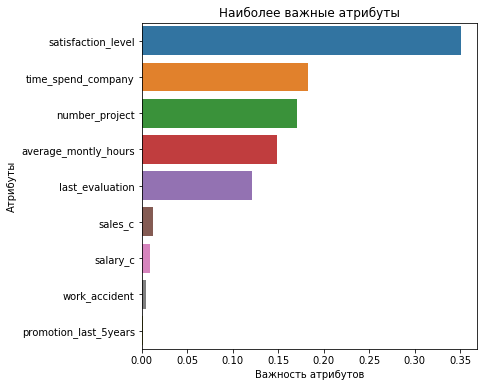

In [35]:
x = df.drop(['sales', 'salary', 'left'], axis=1)
y = df.left

#  нормализация данных
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # диапазон: 0...1

# np_scaled = min_max_scaler.fit_transform(x)
# x_norm = pd.DataFrame(np_scaled)
# x_norm.columns = list(x.columns.values)
# x_norm.head()

# построение модели
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создание модели деревья решений
#  100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучение модели
model.fit(x_train, y_train)

# расчет качества модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" дала точность предсказания порядка {model.score(x_test, y_test)}.')

# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# plt.legend()
plt.show()

## Заключение

**Выводы:** 
- влияют сильнее всего:
    - уровень удовлетворенности, 
    - стаж, 
    - проект, в
    - ремя работы и последняя оценка


- обратить внимание на 
    - сотрудников со стажем 3-4 года;
    - отделы кадров, продаж, технический и бухгалтерию - что то в них не так;
    

К увольнению приводят:
- неудовлетворенность сотрудников
- завершение проекта